Import package

In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import cv2
import tensorflow as tf
from PIL import Image
import os
from sklearn.model_selection import train_test_split
from keras.utils import to_categorical
from keras.models import Sequential, load_model
from keras.layers import Conv2D, MaxPool2D, Dense, Flatten, Dropout

Global variable
- data: all image in array format
- labels: labels of images
- classes: number of trafic sign type
- cur_path: current path of the project

In [2]:
data = []
labels = []
classes = 43
cur_path = os.getcwd()

Retrieving the images and their labels 

In [4]:
for i in range(classes):
    path = os.path.join(cur_path,'dataset/train',str(i))
    imagePaths = os.listdir(path)

    for imagePath in imagePaths:
        try:
            image = Image.open(path + '\\'+ imagePath)
            image = image.resize((30,30))
            image = np.array(image)
            #sim = Image.fromarray(image)
            data.append(image)
            labels.append(i)
        except:
            print("Error loading image")

Converting lists into numpy arrays

Output explain:
- ({number_of_images}, {image_size}, {image_size}, {image_color_RGB})
- ({number_of_images})

In [6]:
data = np.array(data)
labels = np.array(labels)

print(data.shape, labels.shape)

(39209, 30, 30, 3) (39209,)


Splitting training and testing dataset

In [7]:
X_train, X_test, y_train, y_test = train_test_split(data, labels, test_size=0.2, random_state=42)

print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(31367, 30, 30, 3) (7842, 30, 30, 3) (31367,) (7842,)


Converting the labels into one hot encoding

[one-hot encoding explain](https://www.geeksforgeeks.org/ml-one-hot-encoding-of-datasets-in-python/)

In [8]:
y_train = to_categorical(y_train, 43)
y_test = to_categorical(y_test, 43)

print(y_train.shape, y_test.shape)

(31367, 43) (7842, 43)


Building the model

We are using **CNN** model, which is best for image classification purposes

In [9]:
model = Sequential()
model.add(Conv2D(filters=32, kernel_size=(5,5), activation='relu', input_shape=X_train.shape[1:]))
model.add(Conv2D(filters=32, kernel_size=(5,5), activation='relu'))
model.add(MaxPool2D(pool_size=(2, 2)))
model.add(Dropout(rate=0.25))
model.add(Conv2D(filters=64, kernel_size=(3, 3), activation='relu'))
model.add(Conv2D(filters=64, kernel_size=(3, 3), activation='relu'))
model.add(MaxPool2D(pool_size=(2, 2)))
model.add(Dropout(rate=0.25))
model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dropout(rate=0.5))
model.add(Dense(43, activation='softmax'))

Compilation of the model

In [10]:
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

epochs = 15
history = model.fit(X_train, y_train, batch_size=32, epochs=epochs, validation_data=(X_test, y_test))
model.save("my_model.h5")

Epoch 1/15
981/981 [==============================] - 99s 98ms/step - loss: 2.1239 - accuracy: 0.4517 - val_loss: 0.8408 - val_accuracy: 0.7703
Epoch 2/15
981/981 [==============================] - 91s 93ms/step - loss: 1.0767 - accuracy: 0.6789 - val_loss: 0.6897 - val_accuracy: 0.8389
Epoch 3/15
981/981 [==============================] - 93s 95ms/step - loss: 0.8285 - accuracy: 0.7477 - val_loss: 0.3678 - val_accuracy: 0.8898
Epoch 4/15
981/981 [==============================] - 95s 97ms/step - loss: 0.7080 - accuracy: 0.7834 - val_loss: 0.2962 - val_accuracy: 0.9231
Epoch 5/15
981/981 [==============================] - 97s 99ms/step - loss: 0.6285 - accuracy: 0.8097 - val_loss: 0.2787 - val_accuracy: 0.9214
Epoch 6/15
981/981 [==============================] - 97s 99ms/step - loss: 0.5729 - accuracy: 0.8264 - val_loss: 0.2546 - val_accuracy: 0.9300
Epoch 7/15
981/981 [==============================] - 97s 99ms/step - loss: 0.5510 - accuracy: 0.8322 - val_loss: 0.2685 - val_accuracy:

Plotting graphs for accuracy 

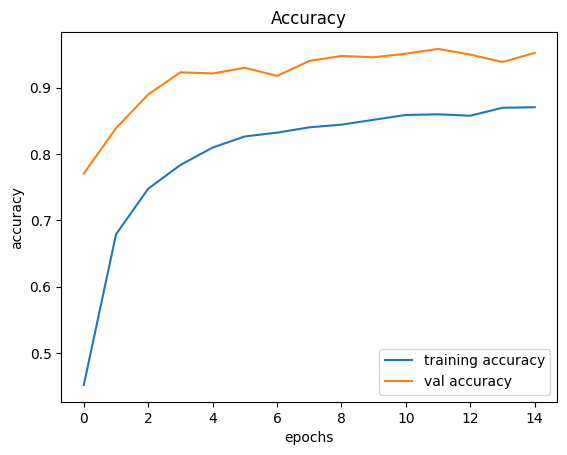

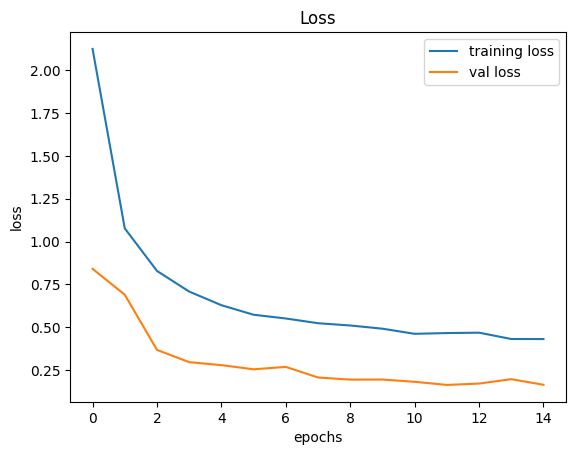

In [11]:
plt.figure(0)
plt.plot(history.history['accuracy'], label='training accuracy')
plt.plot(history.history['val_accuracy'], label='val accuracy')
plt.title('Accuracy')
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.legend()
plt.show()

plt.figure(1)
plt.plot(history.history['loss'], label='training loss')
plt.plot(history.history['val_loss'], label='val loss')
plt.title('Loss')
plt.xlabel('epochs')
plt.ylabel('loss')
plt.legend()
plt.show()

Testing accuracy on test dataset

In [14]:
from sklearn.metrics import accuracy_score

y_test = pd.read_csv('dataset/Test.csv')

labels = y_test["ClassId"].values
imgs = y_test["Path"].values

data=[]

for img in imgs:
    image = Image.open("dataset/" + img)
    image = image.resize((30,30))
    data.append(np.array(image))

X_test=np.array(data)

pred = model.predict_classes(X_test)

AttributeError: 'Sequential' object has no attribute 'predict_classes'

Accuracy with the test data

In [ ]:
from sklearn.metrics import accuracy_score
print(accuracy_score(labels, pred))